In [6]:
import pandas as pd

df = pd.read_csv('./data/search_results_2023-06-21_0659pm.csv', low_memory=False, skiprows=3)
df.columns = [c.replace(' ', '_').replace('.', '_').lower() for c in df.columns]

df.shape

(5000, 545)

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    s = df.isna().sum()
    display(s[s > 0])

amends_bill             4884
sponsor                   12
date_offered            4884
date_of_introduction     116
number_of_cosponsors    1091
date_submitted          5000
date_proposed           5000
committees               148
cosponsor               1091
cosponsor_1             1690
cosponsor_2             2028
cosponsor_3             2335
cosponsor_4             3084
cosponsor_5             3264
cosponsor_6             3406
cosponsor_7             3544
cosponsor_8             3644
cosponsor_9             3743
cosponsor_10            3827
cosponsor_11            3897
cosponsor_12            3945
cosponsor_13            4015
cosponsor_14            4062
cosponsor_15            4108
cosponsor_16            4149
cosponsor_17            4191
cosponsor_18            4230
cosponsor_19            4272
cosponsor_20            4298
cosponsor_21            4323
cosponsor_22            4356
cosponsor_23            4377
cosponsor_24            4404
cosponsor_25            4427
cosponsor_26  

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,legislation_number,url,congress,title,amends_bill,sponsor,date_offered,date_of_introduction,number_of_cosponsors,date_submitted,date_proposed,committees,latest_action,latest_action_date,cosponsor,cosponsor_1,cosponsor_2,cosponsor_3,cosponsor_4,cosponsor_5,cosponsor_6,cosponsor_7,cosponsor_8,cosponsor_9,cosponsor_10,cosponsor_11,cosponsor_12,cosponsor_13,cosponsor_14,cosponsor_15,cosponsor_16,cosponsor_17,cosponsor_18,cosponsor_19,cosponsor_20,cosponsor_21,cosponsor_22,cosponsor_23,cosponsor_24,cosponsor_25,cosponsor_26,cosponsor_27,cosponsor_28,cosponsor_29,cosponsor_30,cosponsor_31,cosponsor_32,cosponsor_33,cosponsor_34,cosponsor_35,cosponsor_36,cosponsor_37,cosponsor_38,cosponsor_39,cosponsor_40,cosponsor_41,cosponsor_42,cosponsor_43,cosponsor_44,cosponsor_45,cosponsor_46,cosponsor_47,cosponsor_48,cosponsor_49,cosponsor_50,cosponsor_51,cosponsor_52,cosponsor_53,cosponsor_54,cosponsor_55,cosponsor_56,cosponsor_57,cosponsor_58,cosponsor_59,cosponsor_60,cosponsor_61,cosponsor_62,cosponsor_63,cosponsor_64,cosponsor_65,cosponsor_66,cosponsor_67,cosponsor_68,cosponsor_69,cosponsor_70,cosponsor_71,cosponsor_72,cosponsor_73,cosponsor_74,cosponsor_75,cosponsor_76,cosponsor_77,cosponsor_78,cosponsor_79,cosponsor_80,cosponsor_81,cosponsor_82,cosponsor_83,cosponsor_84,cosponsor_85,cosponsor_86,cosponsor_87,cosponsor_88,cosponsor_89,cosponsor_90,cosponsor_91,cosponsor_92,cosponsor_93,cosponsor_94,cosponsor_95,cosponsor_96,cosponsor_97,cosponsor_98,cosponsor_99,cosponsor_100,cosponsor_101,cosponsor_102,cosponsor_103,cosponsor_104,cosponsor_105,cosponsor_106,cosponsor_107,cosponsor_108,cosponsor_109,cosponsor_110,cosponsor_111,cosponsor_112,cosponsor_113,cosponsor_114,cosponsor_115,cosponsor_116,cosponsor_117,cosponsor_118,cosponsor_119,cosponsor_120,cosponsor_121,cosponsor_122,cosponsor_123,cosponsor_124,cosponsor_125,cosponsor_126,cosponsor_127,cosponsor_128,cosponsor_129,cosponsor_130,cosponsor_131,cosponsor_132,cosponsor_133,cosponsor_134,cosponsor_135,cosponsor_136,cosponsor_137,cosponsor_138,cosponsor_139,cosponsor_140,cosponsor_141,cosponsor_142,cosponsor_143,cosponsor_144,cosponsor_145,cosponsor_146,cosponsor_147,cosponsor_148,cosponsor_149,cosponsor_150,cosponsor_151,cosponsor_152,cosponsor_153,cosponsor_154,cosponsor_155,cosponsor_156,cosponsor_157,cosponsor_158,cosponsor_159,cosponsor_160,cosponsor_161,cosponsor_162,cosponsor_163,cosponsor_164,cosponsor_165,cosponsor_166,cosponsor_167,cosponsor_168,cosponsor_169,cosponsor_170,cosponsor_171,cosponsor_172,cosponsor_173,cosponsor_174,cosponsor_175,cosponsor_176,cosponsor_177,cosponsor_178,cosponsor_179,cosponsor_180,cosponsor_181,cosponsor_182,cosponsor_183,cosponsor_184,cosponsor_185,cosponsor_186,cosponsor_187,cosponsor_188,cosponsor_189,cosponsor_190,cosponsor_191,cosponsor_192,cosponsor_193,cosponsor_194,cosponsor_195,cosponsor_196,cosponsor_197,cosponsor_198,cosponsor_199,cosponsor_200,cosponsor_201,cosponsor_202,cosponsor_203,cosponsor_204,cosponsor_205,cosponsor_206,cosponsor_207,cosponsor_208,cosponsor_209,cosponsor_210,cosponsor_211,cosponsor_212,cosponsor_213,cosponsor_214,cosponsor_215,cosponsor_216,cosponsor_217,cosponsor_218,cosponsor_219,cosponsor_220,cosponsor_221,cosponsor_222,cosponsor_223,cosponsor_224,cosponsor_225,cosponsor_226,cosponsor_227,cosponsor_228,cosponsor_229,cosponsor_230,cosponsor_231,cosponsor_232,cosponsor_233,cosponsor_234,cosponsor_235,cosponsor_236,cosponsor_237,cosponsor_238,cosponsor_239,cosponsor_240,cosponsor_241,cosponsor_242,cosponsor_243,cosponsor_244,cosponsor_245,cosponsor_246,cosponsor_247,cosponsor_248,cosponsor_249,cosponsor_250,cosponsor_251,cosponsor_252,cosponsor_253,cosponsor_254,cosponsor_255,cosponsor_256,cosponsor_257,cosponsor_258,cosponsor_259,cosponsor_260,cosponsor_261,cosponsor_262,cosponsor_263,cosponsor_264,cosponsor_265,cosponsor_266,cosponsor_267,cosponsor_268,cosponsor_269,cosponsor_270,cosponsor_271,cosponsor_272,cosponsor_273,cosponsor_274,cosponsor_275,cosponsor_276,cosponsor_277,cosponsor_278,cosponsor_279,cospo

In [104]:
import numpy as np
import itertools

def parse_sponsor(s):
    if pd.isna(s):
        return np.nan
    
    if s.lower().startswith('rules committ'):
        return np.nan
    
    idx = s.find('[')
    full_name = s[:idx]
    meta = s[idx+1: len(s) -1].split('-')
    
    idx = full_name.find(',')
    last_name = full_name[:idx]
    
    fm_name = full_name[idx+1:].strip().split(' ')
    first_name = fm_name[0]
    if len(fm_name) > 1:
        middle_name = fm_name[1]
    else:
        middle_name = np.nan
        
    if len(meta) > 0:
        title = meta[0]
    else:
        title = np.nan
    if len(meta) > 1:
        party = meta[1]
    else:
        party = np.nan
    if len(meta) > 2:
        state = meta[2]
    else:
        state = np.nan
    if len(meta) > 3:
        district = meta[3]
    else:
        district = np.nan
    
    return last_name, first_name, middle_name, title, party, state, district

def get_sponsor_id(s):
    if pd.isna(s):
        return np.nan
    
    if s.lower().startswith('rules committ'):
        return np.nan
    
    tups = [item for item in parse_sponsor(s) if pd.notna(item) and len(item) > 0]
    tups = '_'.join(tups)
    return tups
    
    
sponsor_fields = [c for c in df.columns if c == 'sponsor' or c.startswith('cosponsor')]
sponsors = itertools.chain(*[df[f].apply(get_sponsor_id) for f in sponsor_fields])
sponsors = filter(lambda item: pd.notna(item), sponsors)
sponsors = sorted(list(set(sponsors)))
sponsor2id = {s: i for i, s in enumerate(sponsors)}
id2sponsor = {i: s for s, i in sponsor2id.items()}

len(sponsors), len(sponsor2id)

(441, 441)

In [106]:
bill_df = [[get_sponsor_id(r[f]) for f in sponsor_fields if pd.notna(r[f])] for _, r in df.iterrows()]
bill_df = [[sponsor2id[s] for s in b if pd.notna(s)] for b in bill_df]
bill_df = [[1 if i in b else 0 for i in range(len(sponsors))] for b in bill_df]
bill_df = pd.DataFrame(bill_df, columns=[f's_{i:02}' for i in range(len(sponsors))])

## Who has the most sponsorship?

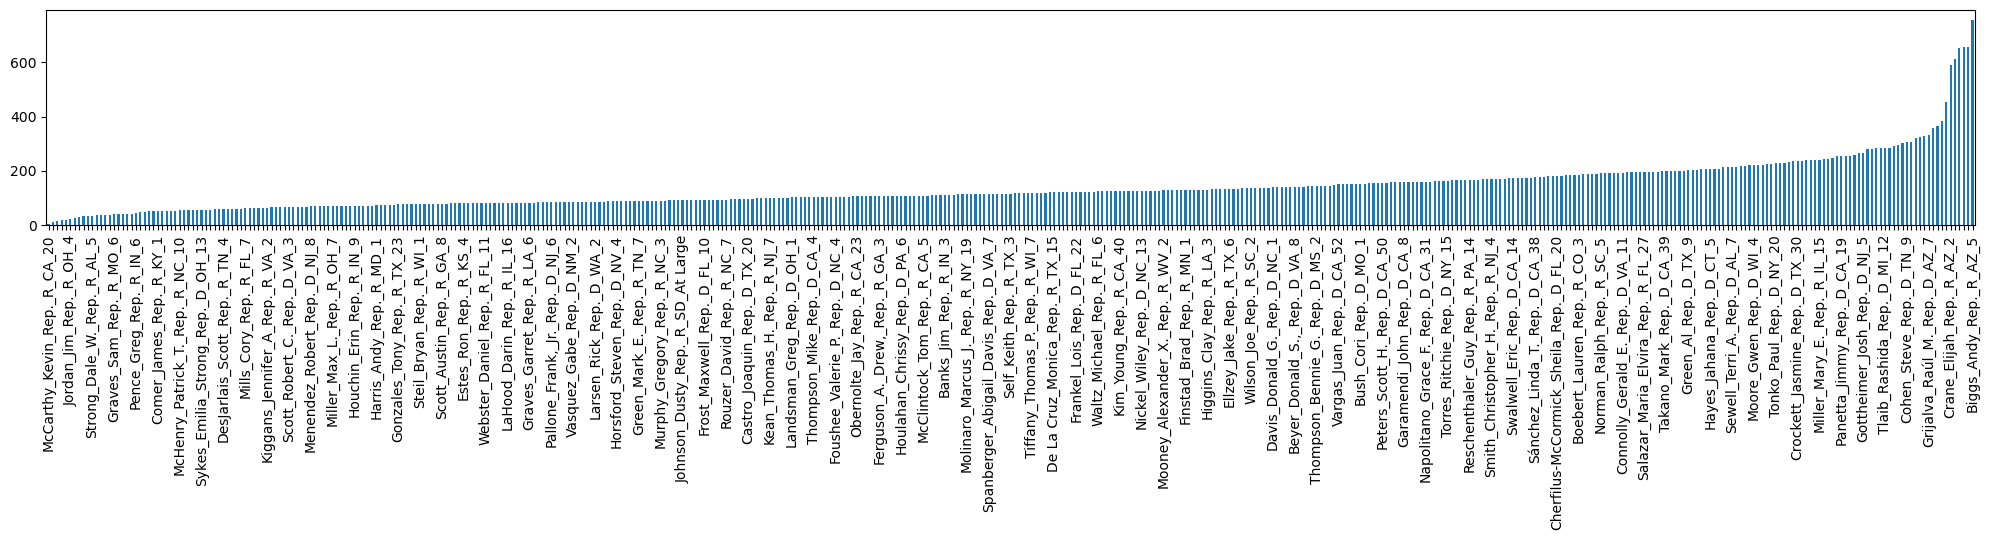

In [107]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5.5))

s = bill_df.sum().sort_values()
s.plot(kind='bar', ax=ax)

xticks = ax.get_xticks()
get_label = lambda t: id2sponsor[int(t.get_text().replace('s_', ''))]
xlabels = [get_label(label) if i % 5 == 0 else '' for i, label in enumerate(ax.get_xticklabels())]
ax.set_xticks(xticks, xlabels, rotation=90, ha='center')

fig.tight_layout()

## Top 50 representative with most sponsorship

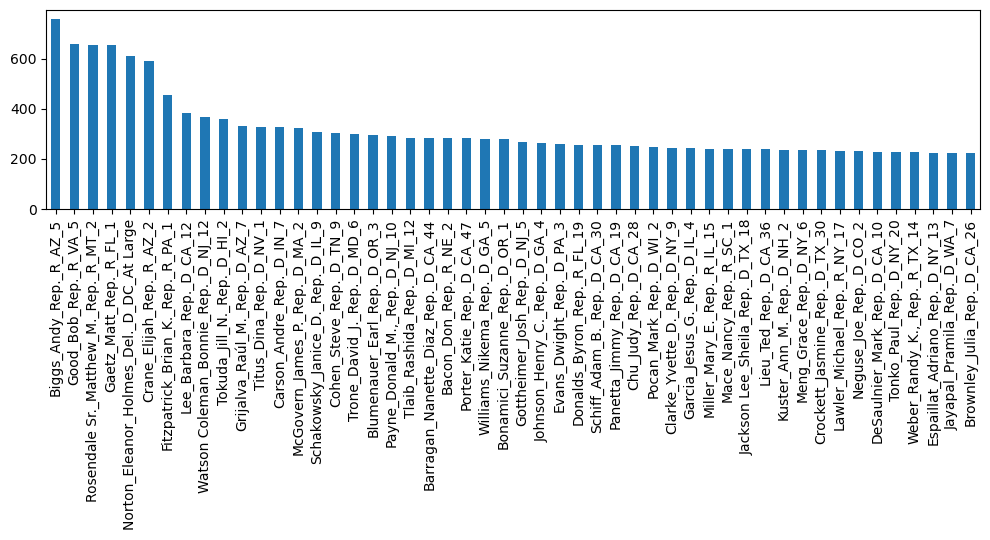

In [108]:
fig, ax = plt.subplots(figsize=(10, 5.5))

s = bill_df.sum().sort_values(ascending=False)
s[:50].plot(kind='bar', ax=ax)

xticks = ax.get_xticks()
get_label = lambda t: id2sponsor[int(t.get_text().replace('s_', ''))]
xlabels = [get_label(label) for i, label in enumerate(ax.get_xticklabels())]
ax.set_xticks(xticks, xlabels, rotation=90, ha='center')

fig.tight_layout()

## Top 50 representative with least sponsorship

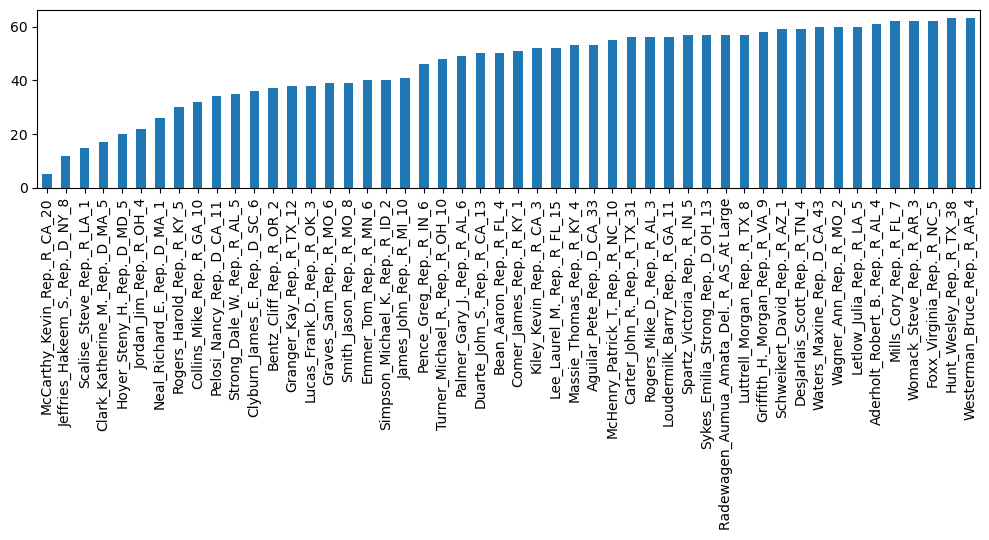

In [109]:
fig, ax = plt.subplots(figsize=(10, 5.5))

s = bill_df.sum().sort_values(ascending=True)
s[:50].plot(kind='bar', ax=ax)

xticks = ax.get_xticks()
get_label = lambda t: id2sponsor[int(t.get_text().replace('s_', ''))]
xlabels = [get_label(label) for i, label in enumerate(ax.get_xticklabels())]
ax.set_xticks(xticks, xlabels, rotation=90, ha='center')

fig.tight_layout()

In [117]:
bill_df

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,s_431,s_432,s_433,s_434,s_435,s_436,s_437,s_438,s_439,s_440
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
def jaccard(x, y):
    item_df = pd.DataFrame({'x': x, 'y': y})
    a = item_df[(item_df['x']==1) & (item_df['y']==1)].shape[0]
    b = item_df[(item_df['x']==1) & (item_df['y']==0)].shape[0]
    c = item_df[(item_df['x']==0) & (item_df['y']==1)].shape[0]
    
    return a / (a + b + c)

corr_df = bill_df.corr(method=jaccard, numeric_only=True)
corr_df.shape

(441, 441)

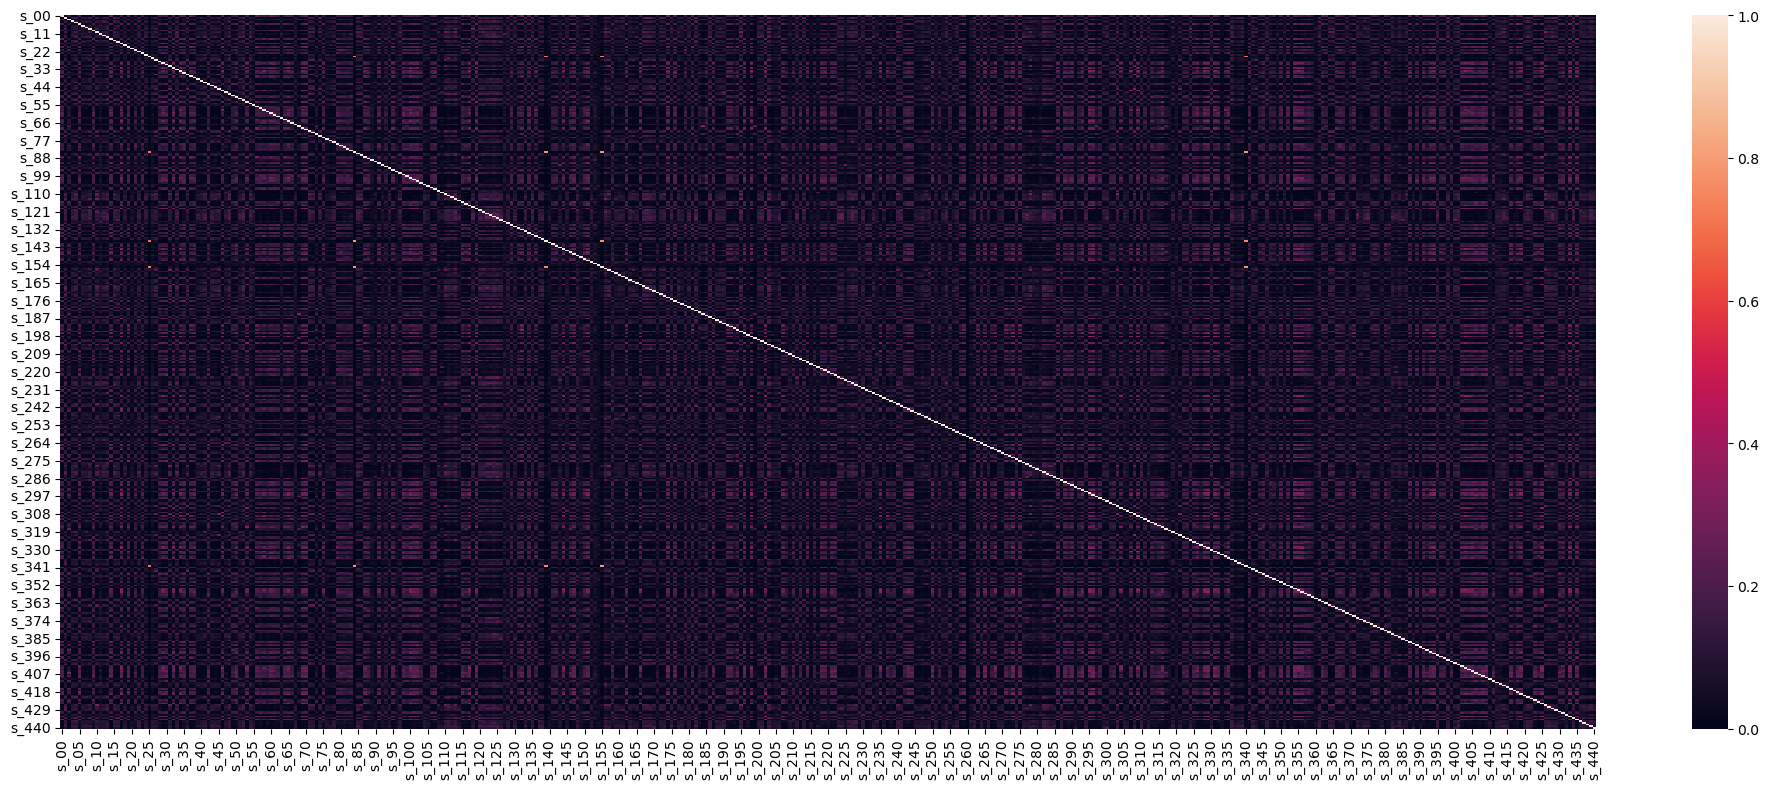

In [127]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 8))

sns.heatmap(corr_df, ax=ax)

fig.tight_layout()

In [131]:
mask = np.triu(np.ones(corr_df.shape)).astype(bool)

L = corr_df.where(mask).stack() \
    .reset_index() \
    .set_axis(['x', 'y', 'value'], axis=1) \
    .query('x != y') \
    .sort_values(['value'], ascending=False) \
    .query('value > 0')

L

,x,y,value
33814,s_84,s_340,0.800578
56605,s_155,s_340,0.796170
33629,s_84,s_155,0.791667
33613,s_84,s_139,0.789928
51724,s_139,s_155,0.764468
...,...,...,...
11029,s_25,s_329,0.000963
7369,s_17,s_25,0.000962
10753,s_25,s_53,0.000925
11104,s_25,s_404,0.000897


In [140]:
import networkx as nx
from networkx.algorithms.shortest_paths.generic import has_path

g = nx.Graph()

for idx in id2sponsor:
    g.add_node(f's_{idx:02}')
    
for _, r in L.iterrows():
    n1, n2 = r['x'], r['y']
    if not has_path(g, n1, n2):
        g.add_edge(n1, n2, weight=r['value'])
        
    if len(g.edges()) == len(id2sponsor) - 1:
        break

In [141]:
len(g.nodes()), len(g.edges())

(441, 440)

In [174]:
pos = nx.spring_layout(g, seed=37, iterations=5_500, k=0.9)

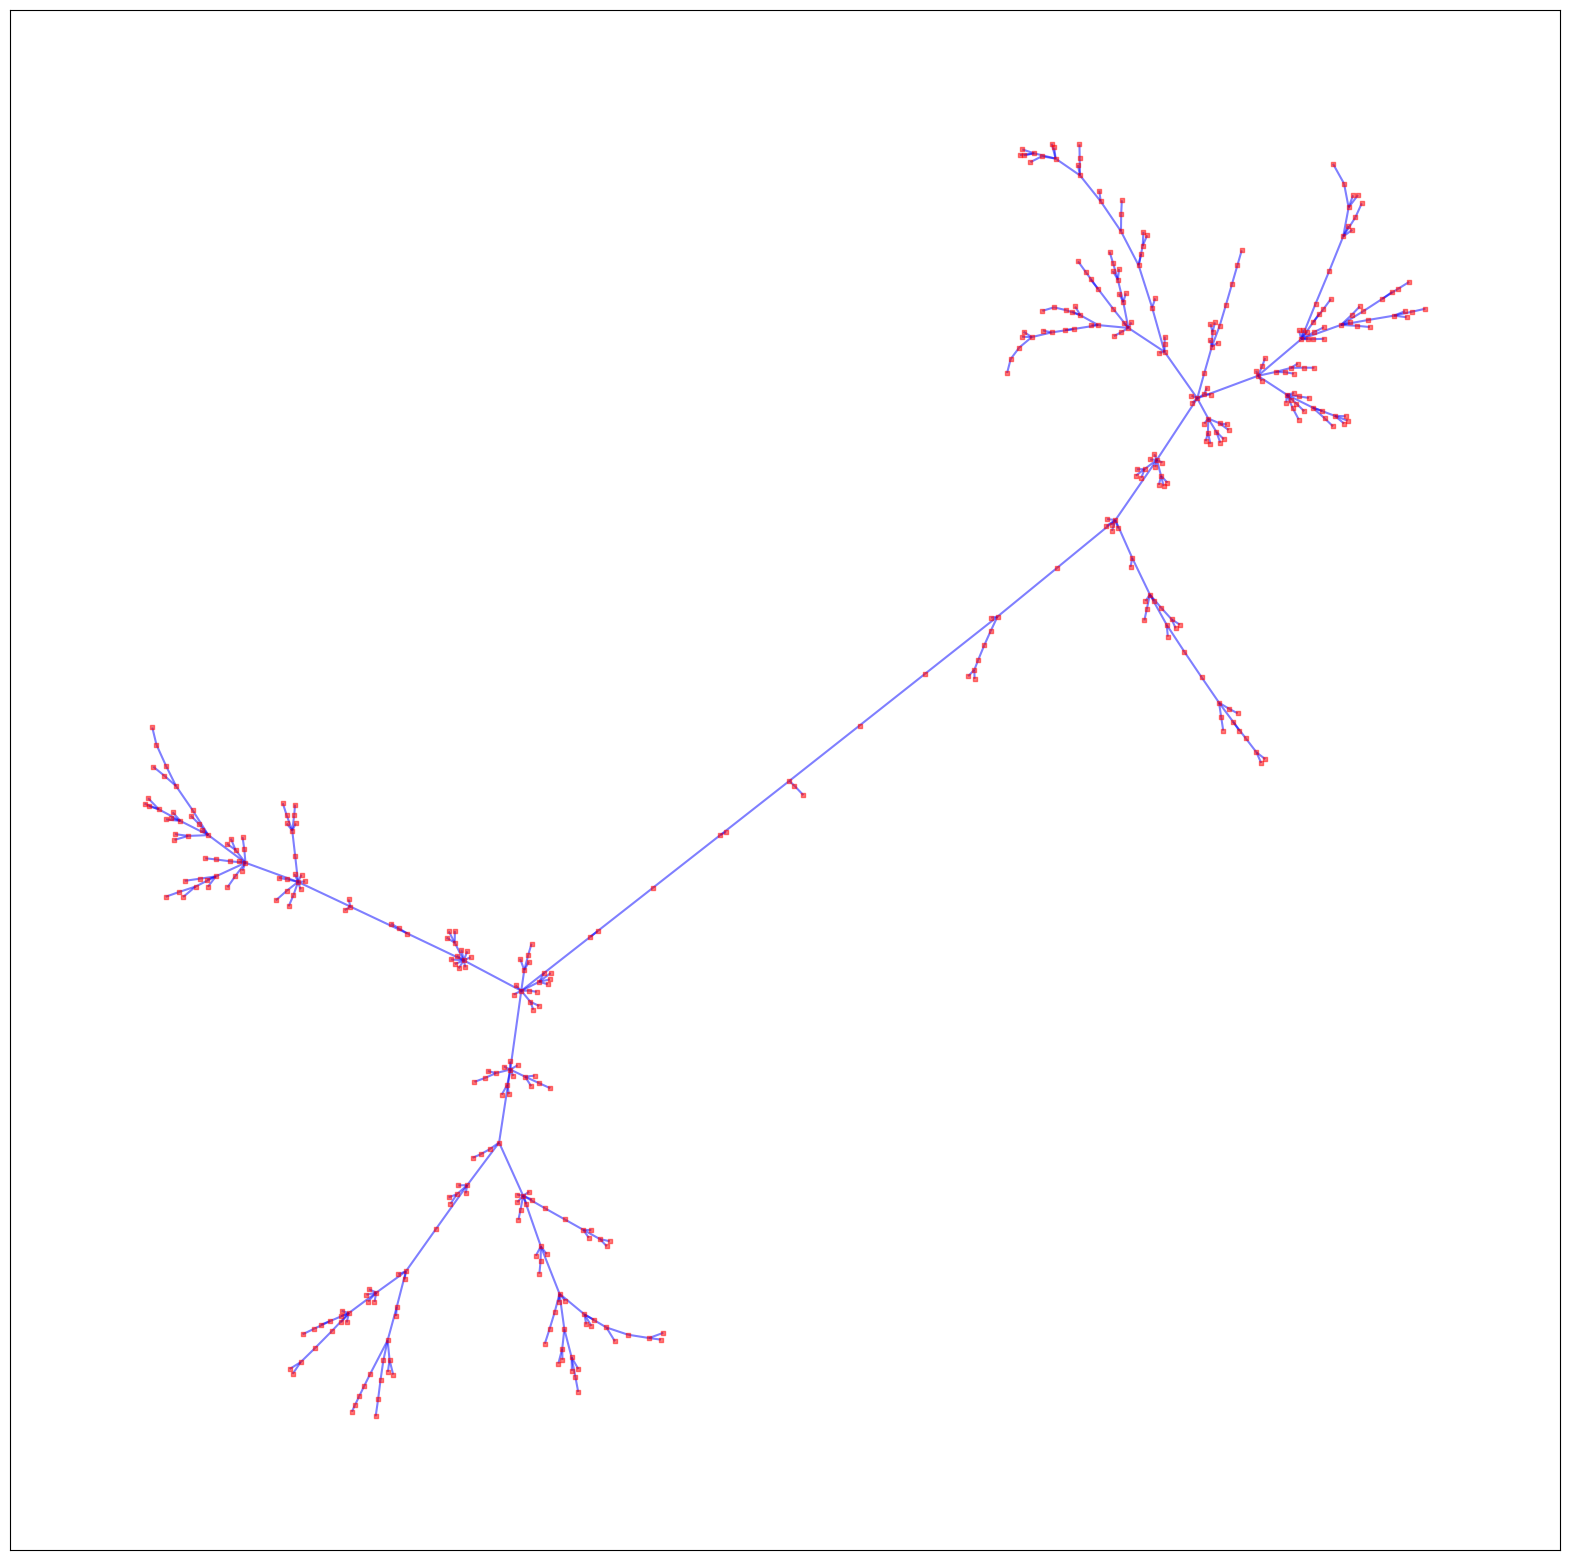

In [178]:
fig, ax = plt.subplots(figsize=(20, 20))

params = {
    'node_color': 'r',
    'node_size': 5,
    'node_shape': 's',
    'alpha': 0.5,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_nodes(g, **params)

params = {
    'font_size': 10,
    'font_color': 'k',
    'font_family': 'monospace',
    'pos': pos,
    'ax': ax
}
# _ = nx.drawing.nx_pylab.draw_networkx_labels(g, **params)

params = {
    'width': 1.5,
    'alpha': 0.5,
    'edge_color': 'b',
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_edges(g, **params)